In [1]:
 ## Getting a necessary modules

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd

In [3]:
data = fetch_california_housing()
column = data.feature_names

In [4]:
x = data.data
y = data.target

In [5]:
new_Data = pd.DataFrame(x, columns=column)

In [6]:
new_Data["Price"]=y

In [7]:
### Data Preprocessing and features Scaling
print(new_Data.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [8]:
print(new_Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


In [9]:
described_Data = new_Data.describe()
print(described_Data)

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         Price  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

In [10]:
column_name_for_described_data = described_Data.columns

In [32]:
def check_skew(one,two):
  for i in list(one):
    if two[i]["min"]>0:
      if (two[i]["25%"] - two[i]["min"]) > two[i]["max"] - two[i]["75%"]:
        print(f"Left  {i},\t {two[i].skew()} ")
      if (two[i]["25%"] - two[i]["min"]) < two[i]["max"] - two[i]["75%"]:
        print(f"Right {i},\t {two[i].skew()} ")
one = column_name_for_described_data
two = described_Data
check_skew(one,two)


Right MedInc,	 2.8284250285993946 
Left  HouseAge,	 2.828401570160109 
Right AveRooms,	 2.828179938919521 
Right AveBedrms,	 2.8284127609692886 
Right Population,	 1.8109494301415312 
Right AveOccup,	 2.808764374955329 
Right Latitude,	 2.828411269329629 
Right Price,	 2.8284269084665272 


We can jump into the conclusion that since each data has skewness greater than 1 so the entire data is highly skewed and needs transformations.


In [12]:
house_age = new_Data["HouseAge"]

In [13]:
print(house_age.skew())

0.060330637599136865


<ipython-input-14-9efae238250f>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house_age)


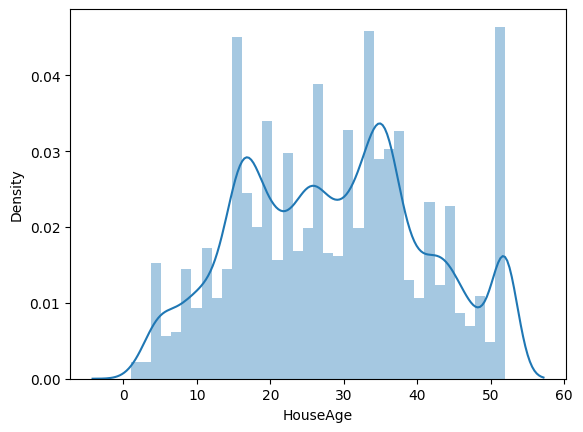

In [14]:
## Visually checking the data
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(house_age)
plt.show()

(array([ 719., 1104., 2235., 2681., 2510., 2354., 3555., 1900., 1616.,
        1966.]),
 array([ 1. ,  6.1, 11.2, 16.3, 21.4, 26.5, 31.6, 36.7, 41.8, 46.9, 52. ]),
 <BarContainer object of 10 artists>)

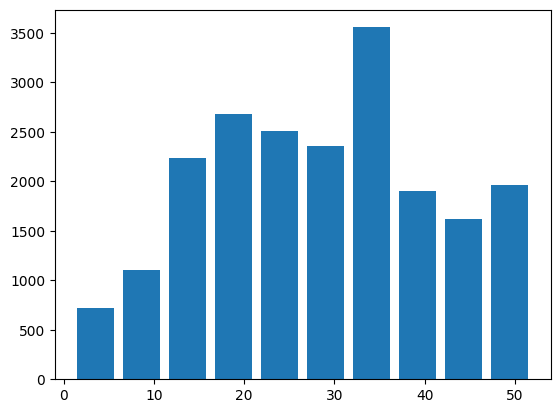

In [15]:
plt.hist(house_age, rwidth=0.8)

<ipython-input-16-9773f7234358>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_Data[i], hist=False)


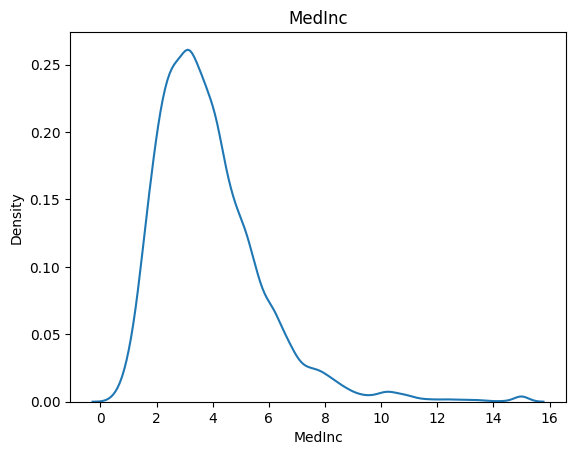

<ipython-input-16-9773f7234358>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_Data[i], hist=False)


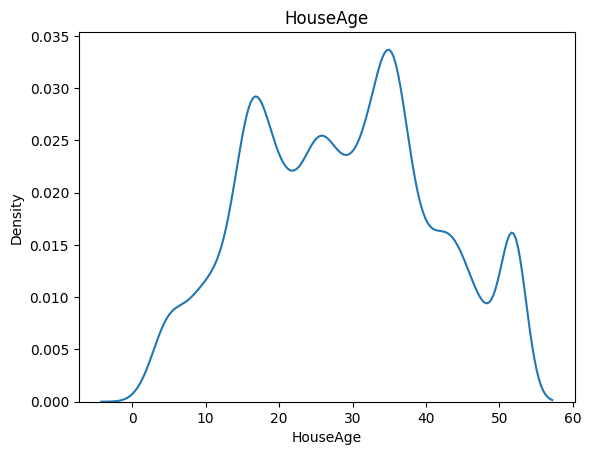

<ipython-input-16-9773f7234358>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_Data[i], hist=False)


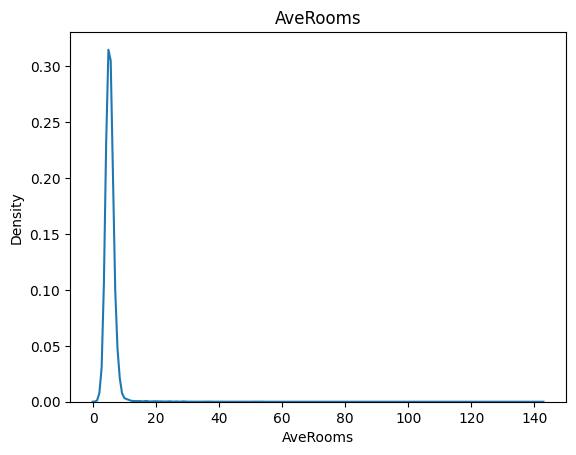

<ipython-input-16-9773f7234358>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_Data[i], hist=False)


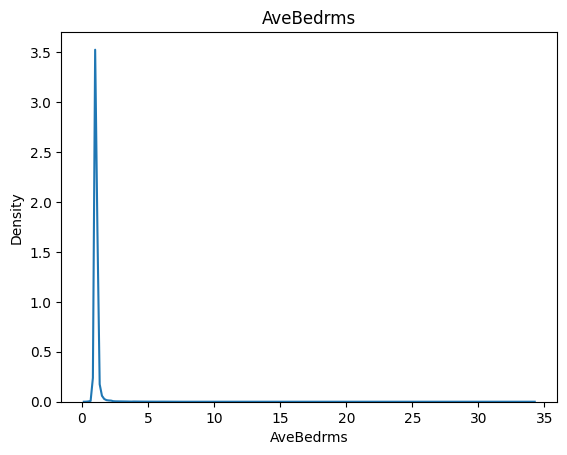

<ipython-input-16-9773f7234358>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_Data[i], hist=False)


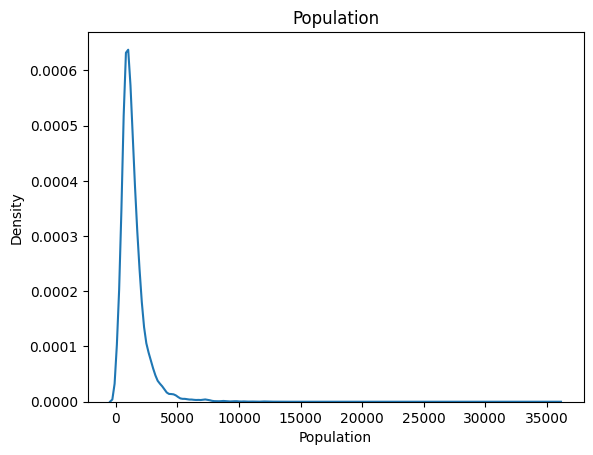

<ipython-input-16-9773f7234358>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_Data[i], hist=False)


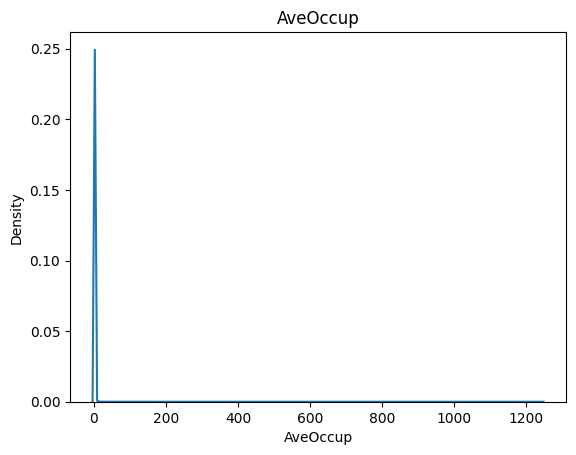

<ipython-input-16-9773f7234358>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_Data[i], hist=False)


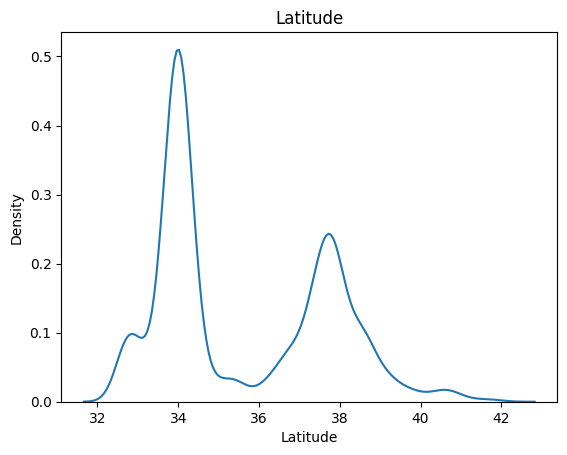

<ipython-input-16-9773f7234358>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_Data[i], hist=False)


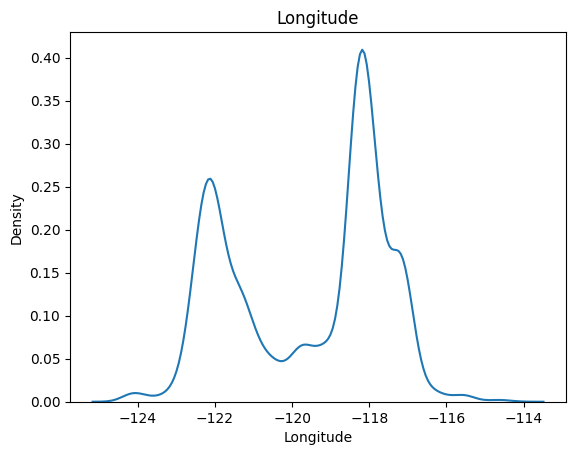

<ipython-input-16-9773f7234358>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_Data[i], hist=False)


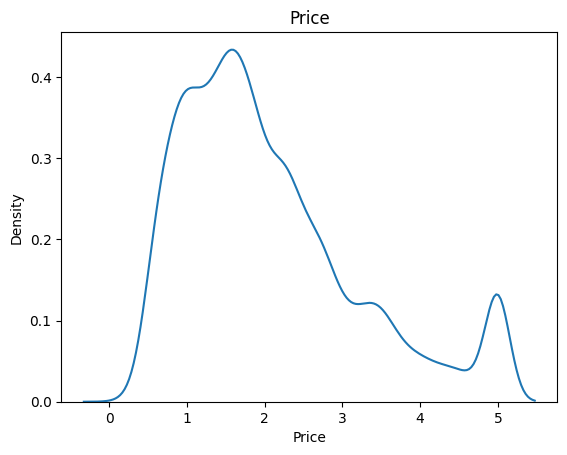

In [16]:
for i in list(new_Data.columns):
  sns.distplot(new_Data[i], hist=False)
  plt.title(f"{i}")
  plt.show()

In [20]:
import numpy as np
transformed_data = np.log(new_Data)

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


<ipython-input-22-6caa1a027443>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_data[i], hist=False)


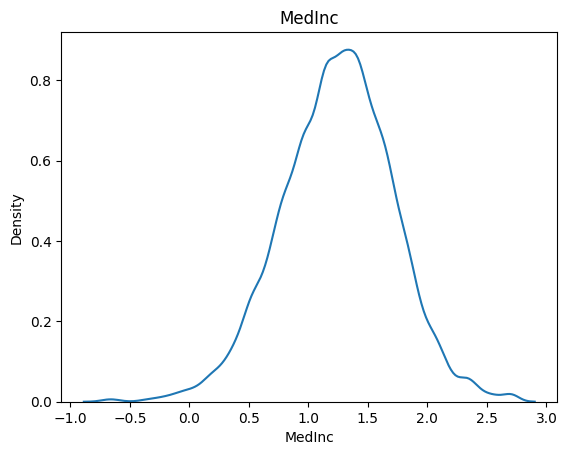

<ipython-input-22-6caa1a027443>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_data[i], hist=False)


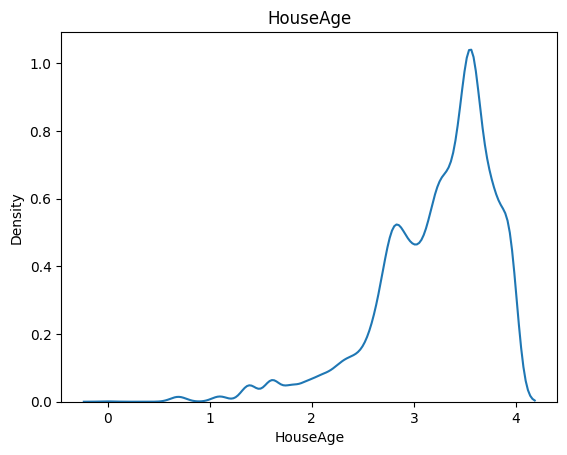

<ipython-input-22-6caa1a027443>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_data[i], hist=False)


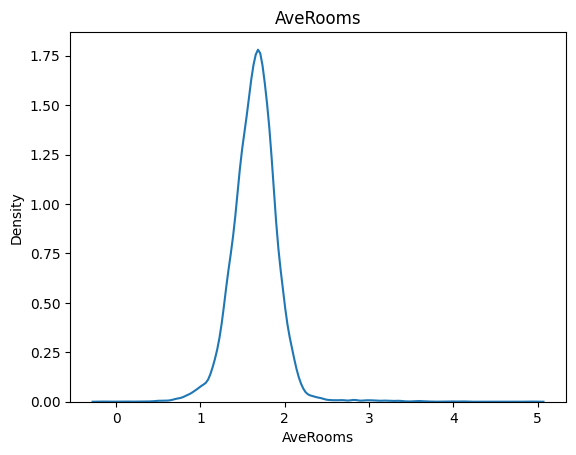

<ipython-input-22-6caa1a027443>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_data[i], hist=False)


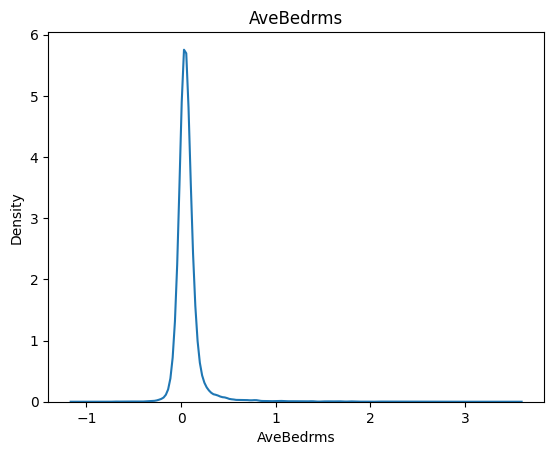

<ipython-input-22-6caa1a027443>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_data[i], hist=False)


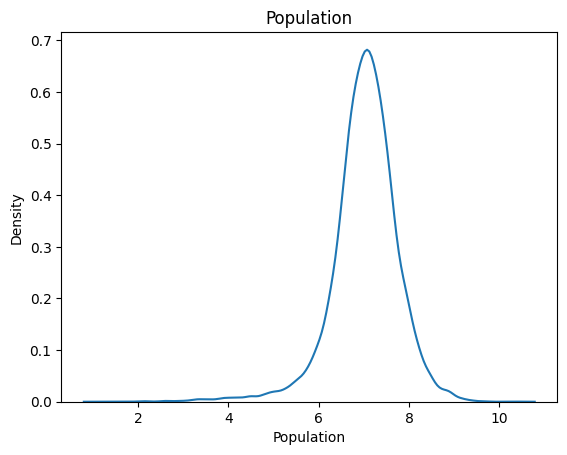

<ipython-input-22-6caa1a027443>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_data[i], hist=False)


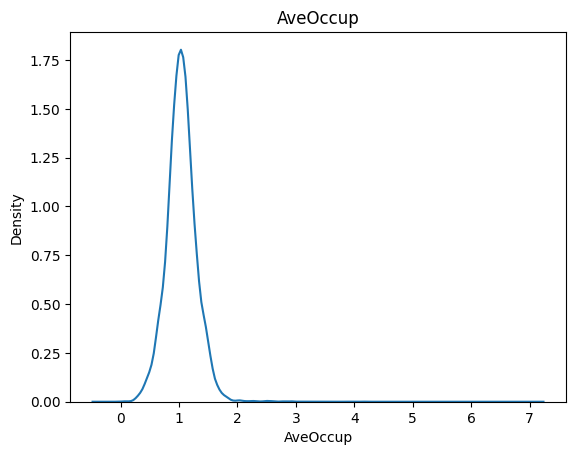

<ipython-input-22-6caa1a027443>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_data[i], hist=False)


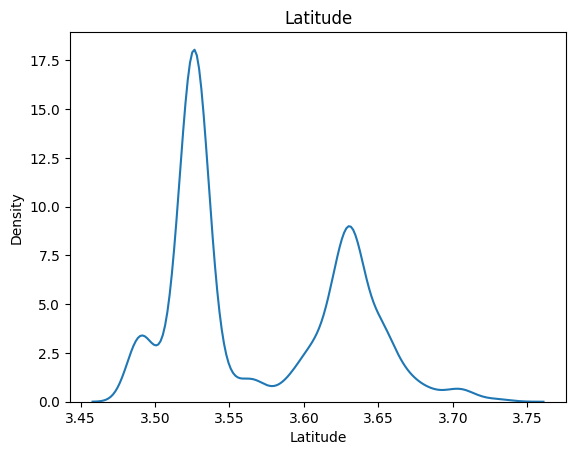

<ipython-input-22-6caa1a027443>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_data[i], hist=False)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2464: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


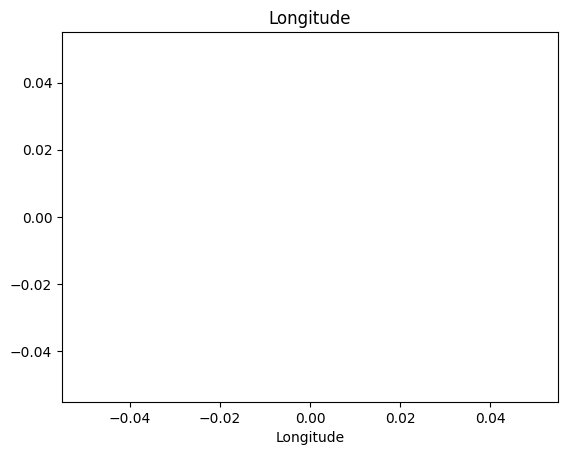

<ipython-input-22-6caa1a027443>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_data[i], hist=False)


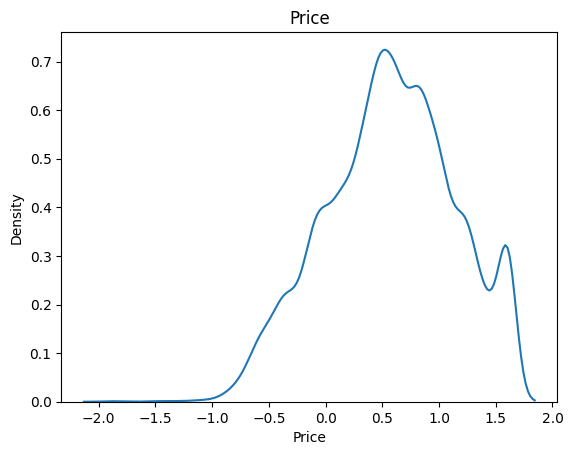

In [22]:
for i in list(transformed_data.columns):
  sns.distplot(transformed_data[i], hist=False)
  plt.title(f"{i}")
  plt.show()

In [23]:
described_Data = new_Data.describe()
print(described_Data)

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         Price  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

In [24]:
described_data = transformed_data.describe()
print(described_data)

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       1.244465      3.225135      1.647771      0.070229      7.024116   
std        0.470653      0.567748      0.274652      0.165160      0.738524   
min       -0.693347      0.000000     -0.167054     -1.098612      1.098612   
25%        0.941334      2.890372      1.490816      0.006061      6.668228   
50%        1.262657      3.367296      1.654245      0.047628      7.061334   
75%        1.556723      3.610918      1.800452      0.094879      7.452982   
max        2.708057      3.951244      4.955187      3.528319     10.482402   

           AveOccup      Latitude  Longitude         Price  
count  20640.000000  20640.000000        0.0  20640.000000  
mean       1.043310      3.571471        NaN      0.571959  
std        0.270723      0.059253        NaN      0.569134  
min       -0.367725      3.482470        NaN

In [27]:
column_name_for_described_data = described_Data.columns

In [33]:
check_skew(column_name_for_described_data,transformed_data)

Right MedInc,	 2.8284250285993946 
Left  HouseAge,	 2.828401570160109 
Right AveRooms,	 2.828179938919521 
Right AveBedrms,	 2.8284127609692886 
Right Population,	 1.8109494301415312 
Right AveOccup,	 2.808764374955329 
Right Latitude,	 2.828411269329629 
Right Price,	 2.8284269084665272 


In [35]:
print(transformed_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   0 non-null      float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


In [36]:
print(transformed_data.head())

     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  2.119287  3.713572  1.943640   0.023530    5.774552  0.938270  3.634423   
1  2.116424  3.044522  1.830682  -0.028522    7.783641  0.746613  3.633895   
2  1.982022  3.951244  2.114825   0.070874    6.206576  1.030426  3.633631   
3  1.730434  3.951244  1.760845   0.070514    6.324359  0.935287  3.633631   
4  1.347086  3.951244  1.837665   0.077962    6.336826  0.779998  3.633631   

   Longitude     Price  
0        NaN  1.509839  
1        NaN  1.276758  
2        NaN  1.258745  
3        NaN  1.227592  
4        NaN  1.230225  


In [40]:
new_data = transformed_data.dropna(axis=1)

In [41]:
print(new_data.head())

     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  2.119287  3.713572  1.943640   0.023530    5.774552  0.938270  3.634423   
1  2.116424  3.044522  1.830682  -0.028522    7.783641  0.746613  3.633895   
2  1.982022  3.951244  2.114825   0.070874    6.206576  1.030426  3.633631   
3  1.730434  3.951244  1.760845   0.070514    6.324359  0.935287  3.633631   
4  1.347086  3.951244  1.837665   0.077962    6.336826  0.779998  3.633631   

      Price  
0  1.509839  
1  1.276758  
2  1.258745  
3  1.227592  
4  1.230225  


In [42]:
print(new_data.isnull().sum())

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Price         0
dtype: int64


In [65]:
corr_data = new_data.corr()["Price"][:-1].sort_values(ascending=False)
# corr_data = new_data.corr()["Price"][:-1].sort_values(ascending=False)

NOw We can see that we don't have any non-missing value and so the data has also been transformed and is redy for prediction


In [59]:
print(corr_data)

MedInc        0.673578
AveRooms      0.207359
HouseAge      0.047819
Population    0.026401
AveBedrms    -0.111040
Latitude     -0.188898
AveOccup     -0.234442
Name: Price, dtype: float64


In [66]:
corr_data_index = corr_data[abs(corr_data) > 0.01].index
# corr_data_index = corr_data[abs(corr_data) > 0.01].index

In [67]:
print(corr_data_index)

Index(['MedInc', 'AveRooms', 'HouseAge', 'Population', 'AveBedrms', 'Latitude',
       'AveOccup'],
      dtype='object')


In [68]:
features = list(corr_data_index)
X = transformed_data[features]
y = transformed_data["Price"]

In [72]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.values.reshape(-1,1))

In [73]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [74]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [75]:
prediction = model.predict(X_test)

In [76]:
from sklearn.metrics import mean_squared_error,r2_score
mean_model_evaluation = mean_squared_error(y_test,prediction)
r2_model_evaluation = r2_score(y_test,prediction)

In [77]:
print(mean_model_evaluation)
print(r2_model_evaluation)

0.42902894324691987
0.5718533747654566
